Nama Anggota Kelompok :
- Luqman Hakim (PYTN - KS06 - 003)
- Fellysia Devi Pramono (PYTN - KS06 - 006)

# Project Introduction
Objektif yang ingin dicapai dari final project 1 ini yaitu menerapkan konsep linear regression pada dataset yang dapat diperoleh dari kaggle melalui link berikut https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma .
Dataset yang digunakan yaitu Uber and Lyft Dataset Boston, MA yang berisi record data perjalanan taksi uber dan lyft di Boston, MA. Dataset ini terdiri dari 57 kolom dan 693.071 data.

Dataset ini mengandung banyak nilai NA dan outliers maka cocok untuk dilakukan data cleaning dan preprocessing. Selain itu, dataset ini juga terdiri dari banyak kolom (variabel) sehingga sangat cocok untuk melakukan penerapan linear regression, yang mana bertujuan untuk melihat pola antara variabel-variabel yang berbeda, serta membuat suatu prediksi berdasarkan model regresi linier.

Pada final project 1 ini akan dibuat prediksi harga taksi Uber dan Lyft (cab price), dengan variabel price sebagai variabel dependen (variabel prediktor) dan variabel lainnya yang memiliki korelasi dengan variabel price akan menjadi variabel independen.

# Import Library

In [ ]:
## import library yang dibutuhkan

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import time

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from warnings import filterwarnings

filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Load Dataset

In [ ]:
data = pd.read_csv(r'C:\Users\HP\dataset\rideshare_kaggle.csv') ## Load dataset
data.head() ## Menampilkan 5 data teratas

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dataset ini memiliki 57 attribut, yang mana antara lain :

1. id
2. timestamp
3. hour
4. day
5. month
6. datetime
7. timezone
8. source
9. destination
10. cab_type
11. product_id
12. ... dan lainnya.

dan memiliki 29 tipe data float, 17 tipe data integer, dan juga 11 tipe data object.

Memori yang dibutuhkan untuk data ini sekitar 301.4 MB.

In [ ]:
data.shape

(693071, 57)

data ini terdiri dari 693071 baris dan 57 kolom.

In [ ]:
data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

Tabel diatas merupakan statistik deskriptif yang merangkum tendensi sentral, dispersi, dan bentuk distribusi kumpulan data, tapi tidak termasuk dengan nilai NaN. yang mana menganalisis seri numerik dan objek, serta kumpulan kolom DataFrame dari tipe data campuran. Output akan bervariasi tergantung pada apa yang disediakan.

# Eksplorasi Data

### Melihat harga termahal dari jenis transportasi yang ada dengan memanfaatkan kolom name dan price


Dengan menggunakan groupby, data yang diberikan dikelompokkan berdasarkan rata-rata dari kolom name dan price. Lalu divisualisasikan dengan menggunakan seaborn barplot.

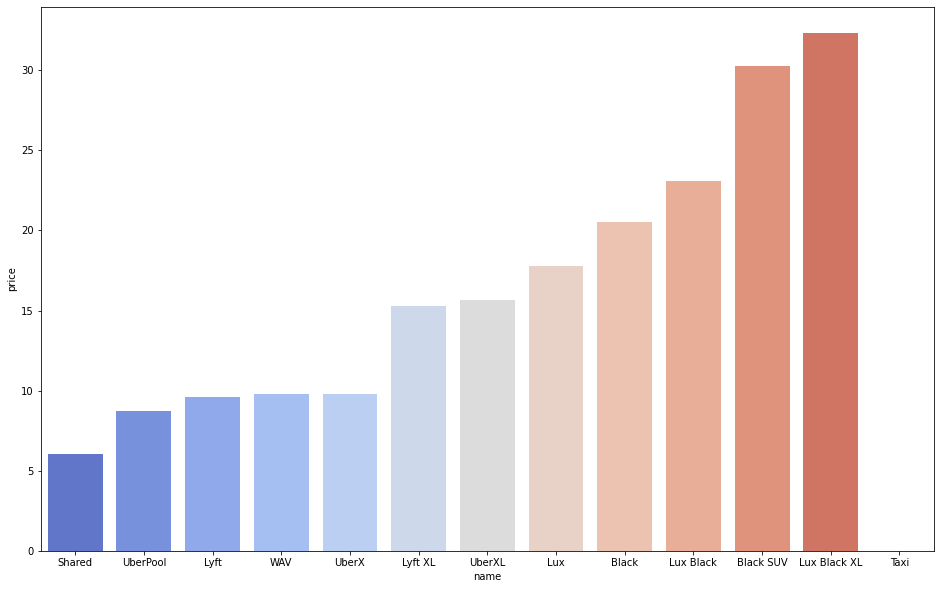

In [ ]:
data_price = data.groupby(["name"])[["price"]].mean()
plt.figure(figsize = (16,10))
sb.barplot(data_price.index, data_price["price"], palette = "coolwarm", order = data_price["price"].sort_values().index)
plt.show()

Dari grafik di atas dapat disimpulkan bahwa Lux Black XL menduduki urutan jenis mobil termahal. Urutan selanjutnya adalah:

2. Black Suv

3. Lux Black

4. Black

5. Lux

6. UberXL

7. Lyft XL

8. UberX

9. WAV

10. Lyft

11. UberPool

12. Shared

### Cek korelasi antara Climate dan Price

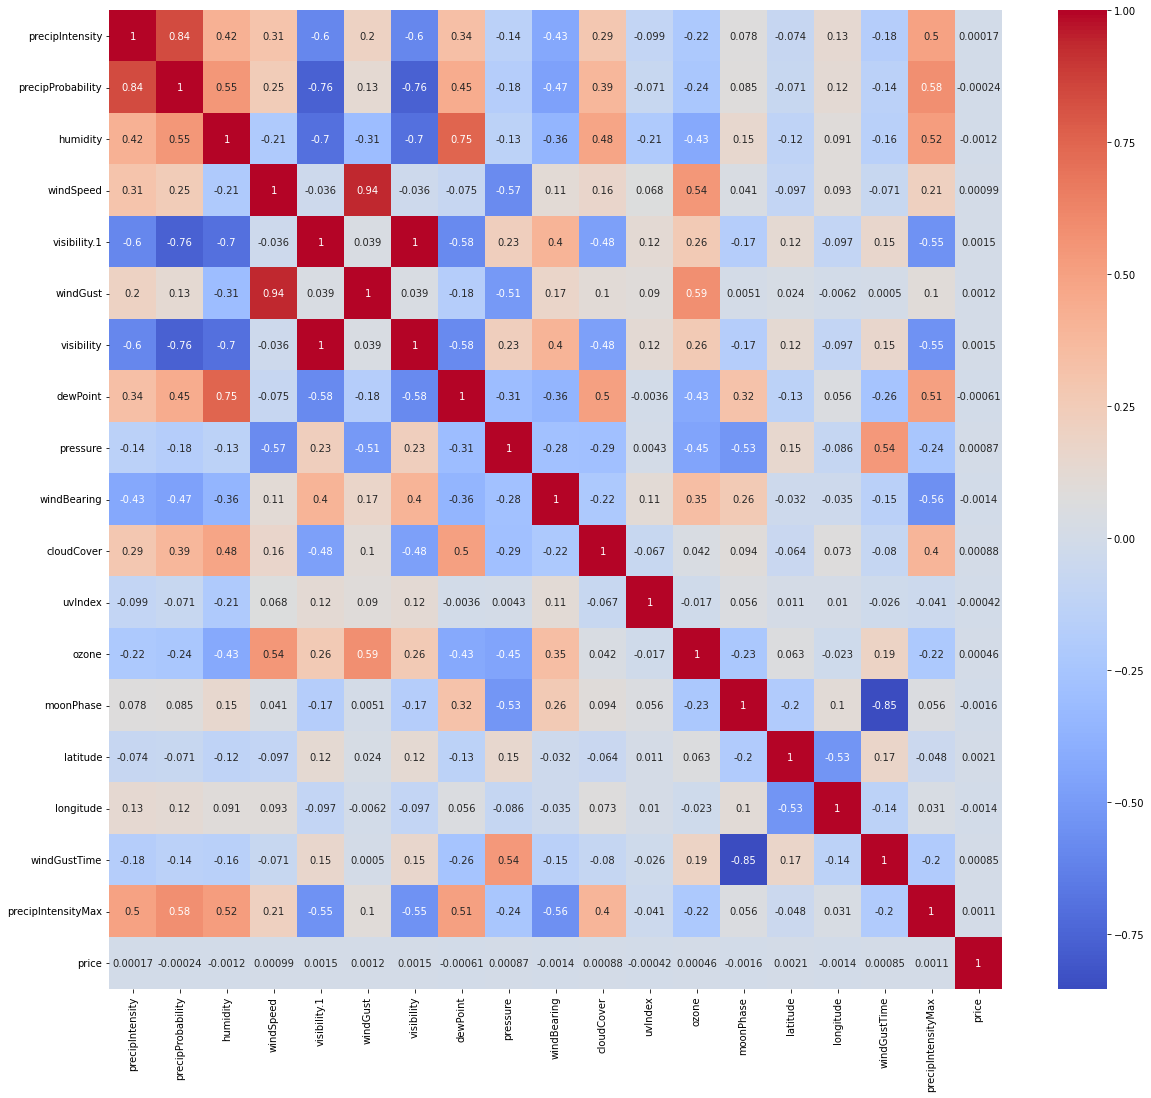

In [ ]:
# membuat variabel list dari kolom yang akan di drop
climate = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'visibility.1',
           'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing', 'cloudCover',
           'uvIndex', 'ozone', 'moonPhase', 'latitude', 'longitude', 'windGustTime',
           'precipIntensityMax', 'price']
# membuat data climate
data_climate = data[climate]

# membuat plot heatmap
plt.figure(figsize=(20, 18))
sb.heatmap(data_climate.corr(), annot=True, cmap='coolwarm')

Dari plot diatas dapat dilihat bahwa feature climate memiliki <b>korelasi yang lemah</b> dengan feature target, sehingga kita dapat melakukan drop pada feature climate yang ada.

In [ ]:
clim_feature = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'visibility.1',
                'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing', 'cloudCover',
                'uvIndex', 'ozone', 'moonPhase', 'latitude', 'longitude', 'windGustTime',
                'precipIntensityMax']

new_data = data.drop(clim_feature, axis=1)
new_data.shape

(693071, 39)

### Cek korelasi antara Temperature dengan Price

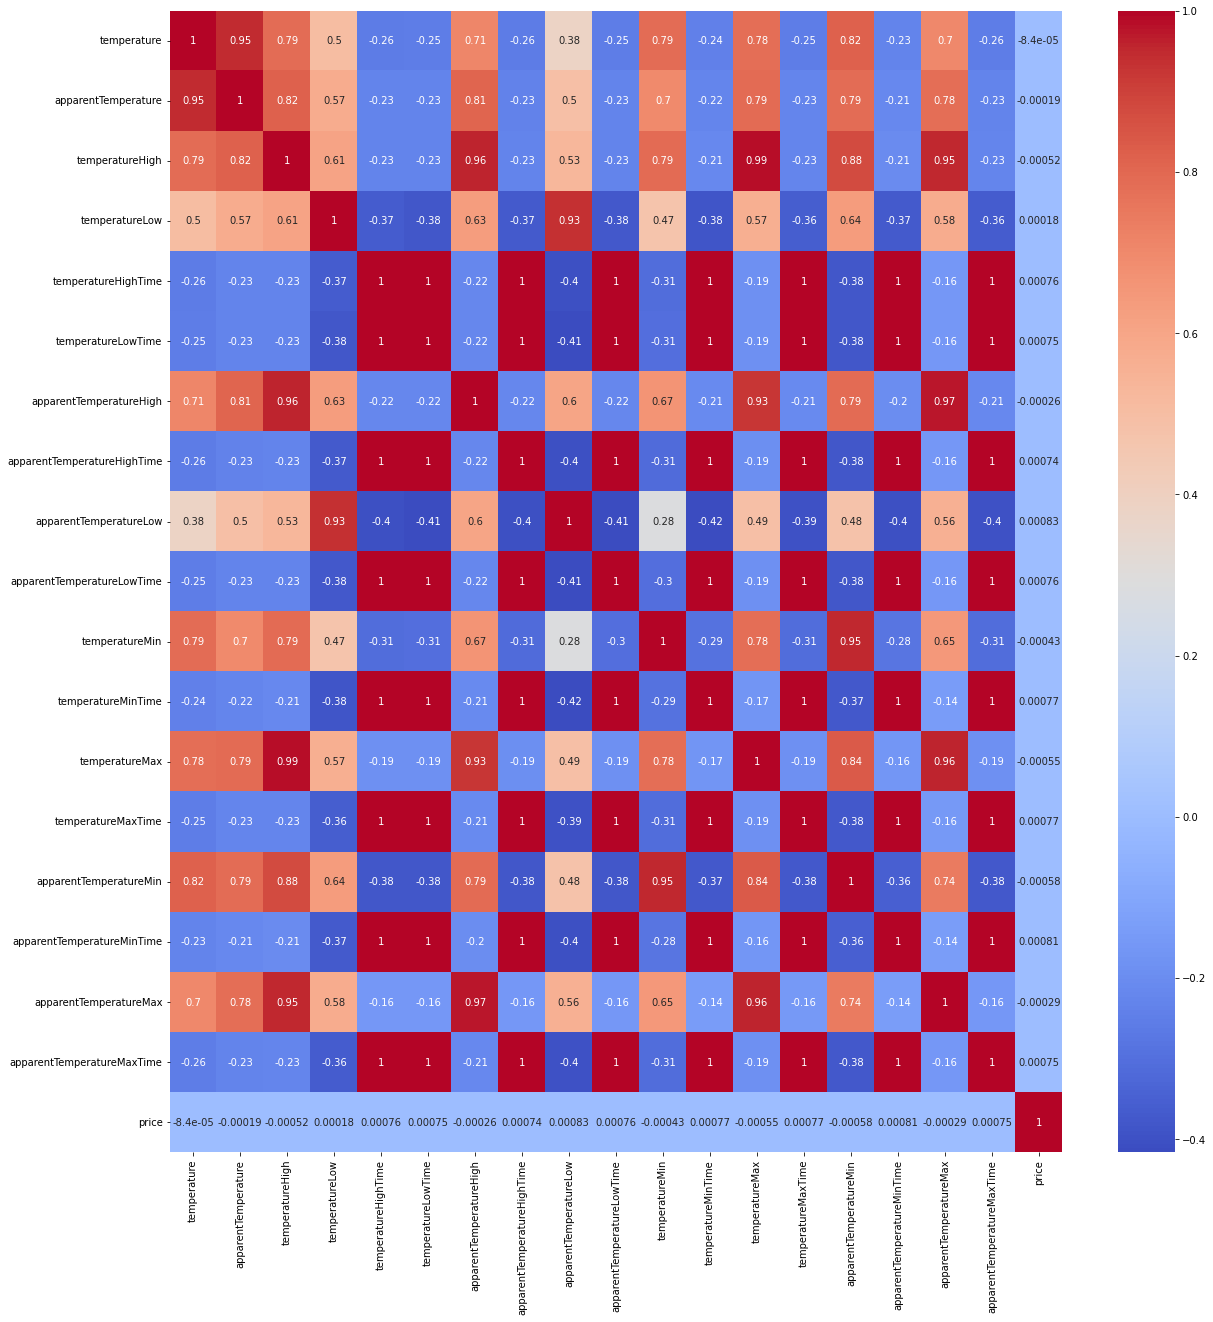

In [ ]:
## membuat list feature temperature
temperature = ['temperature', 'apparentTemperature', 'temperatureHigh', 'temperatureLow', 'temperatureHighTime',
               'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow',
               'apparentTemperatureLowTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
               'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime',
               'price']
## membuat data temperature
data_temperature = new_data[temperature]

## membuat plot heatmap
plt.figure(figsize=(20, 21))
sb.heatmap(data_temperature.corr(), annot=True, cmap='coolwarm')

Dari plot diatas dapat dilihat bahwa feature temperature memiliki <b>korelasi yang lemah</b> dengan feature target, sehingga kita dapat melakukan drop pada feature climate yang ada.

In [ ]:
temp_feature = ['temperature', 'apparentTemperature', 'temperatureHigh', 'temperatureLow', 'temperatureHighTime',
                'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow',
                'apparentTemperatureLowTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
                'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax',
                'apparentTemperatureMaxTime']

new_data = new_data.drop(temp_feature, axis=1)
new_data.shape

(693071, 21)

### Drop kolom feature yang tidak dibutuhkan

In [ ]:
new_data.head(2)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,short_summary,long_summary,icon,sunriseTime,sunsetTime,uvIndexTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night,1544962084,1544994864,1544979600
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,Rain,"Rain until morning, starting again in the eve...",rain,1543232969,1543266992,1543251600


In [ ]:
drop_feature = ['id', 'timestamp', 'datetime', 'timezone', 'product_id',
                'icon', 'long_summary', 'sunriseTime', 'sunsetTime', 'uvIndexTime',
                'source', 'destination', 'hour', 'day', 'month']
new_data = new_data.drop(drop_feature, axis=1)
new_data.head()

,cab_type,name,price,distance,surge_multiplier,short_summary
0,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy
1,Lyft,Lux,11.0,0.44,1.0,Rain
2,Lyft,Lyft,7.0,0.44,1.0,Clear
3,Lyft,Lux Black XL,26.0,0.44,1.0,Clear
4,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy


### Melakukan rename pada beberapa kolom agar lebih mudah dipahami

In [ ]:
## melakukan rename kolom agar beberapa kolom dapat lebih mudah dipahami
new_data = new_data.rename(columns={'name' : 'cab_descr', 'short_summary' : 'weather'})

## menampilkan 5 baris teratas
new_data.head()

,cab_type,cab_descr,price,distance,surge_multiplier,weather
0,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy
1,Lyft,Lux,11.0,0.44,1.0,Rain
2,Lyft,Lyft,7.0,0.44,1.0,Clear
3,Lyft,Lux Black XL,26.0,0.44,1.0,Clear
4,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy


# Data Cleaning (stage 1)

## Handling missing values

In [ ]:
new_data.isna().sum()

cab_type                0
cab_descr               0
price               55095
distance                0
surge_multiplier        0
weather                 0
dtype: int64

Setelah melakukan cek missing value, ternyata terdapat banyak sekali missing value pada kolom price. selanjutnya kita dapat melakukan handling missing value dengan cara menghapus missing value tersebut

In [ ]:
new_data.dropna(inplace=True)

In [ ]:
new_data.isna().sum()

cab_type            0
cab_descr           0
price               0
distance            0
surge_multiplier    0
weather             0
dtype: int64

Setelah melakukan handling missing value, dapat kita lihat missing value yang ada pada kolom price sudah tidak ada.

# Data Preprocessing (stage 1)

Data preprocessing stage 1 disini adalah data preprocessing yang dilakukan setelah melakukan simple data cleaning

Disini kita akan membagi data menjadi 3, yaitu Base data yang memiliki semua value dan atribut, lalu ada Uber data yang mana hanya memiliki atribut berdasarkan grouping pada cab_type 'Uber', dan yang terakhir adalah Lyft data yang hanya memiliki atribut berdasarkan grouping pada cab_type 'Lyft'

In [ ]:
linreg = LinearRegression()

## Base model

### Membuat base data yang mencakup semua jenis cab_type

In [ ]:
base = new_data.copy()
base_data = pd.get_dummies(base, columns=['cab_type', 'cab_descr', 'weather'])

Melakukan encoding pada data yang bertipe object/categorical agar nantinya dapat diolah dengan algoritma linear regression

In [ ]:
base_data.head(3)

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,cab_descr_Black,cab_descr_Black SUV,cab_descr_Lux,cab_descr_Lux Black,cab_descr_Lux Black XL,cab_descr_Lyft,cab_descr_Lyft XL,cab_descr_Shared,cab_descr_UberPool,cab_descr_UberX,cab_descr_UberXL,cab_descr_WAV,weather_ Clear,weather_ Drizzle,weather_ Foggy,weather_ Light Rain,weather_ Mostly Cloudy,weather_ Overcast,weather_ Partly Cloudy,weather_ Possible Drizzle,weather_ Rain
0,5.0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,7.0,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


Setelah melakukan encoding, maka data yang tadinya bertipe object/categorical akan berubah menjadi numeric, sehingga dapat diproses unntuk model liear regression

### Define model base

In [ ]:
x_base = base_data.drop(['price', 'surge_multiplier'], axis=1) ## data feature
y_base = base_data['price'] ## data target

Membagi x dan y dari base data, dengan x (feature) yang berisi semua atribut kecuali 'price', sedangkan y (target) berisi atribut 'price'

In [ ]:
# Splitting X dan y menjadi data training dan data testing
x_train_base, x_test_base, y_train_base, y_test_base = train_test_split(x_base, y_base, test_size=0.3, random_state=100)

Melakukan data split menjadi data training dan data test pada x_base dan y_base yang sudah dibuat sebelumnya

### Melatih model

In [ ]:
model_base = linreg.fit(x_train_base, y_train_base)
y_pred_base = linreg.predict(x_test_base.values)
y_pred_train_base = linreg.predict(x_train_base.values)

### Mendapatkan nilai coefficients dan nilai intercept linear regression

In [ ]:
print(pd.DataFrame(model_base.coef_, x_base.columns, columns=['Coefficients']))

                            Coefficients
distance                        2.839680
cab_type_Lyft                   0.672983
cab_type_Uber                  -0.672983
cab_descr_Black                 4.612684
cab_descr_Black SUV            14.384669
cab_descr_Lux                   0.538426
cab_descr_Lux Black             5.817181
cab_descr_Lux Black XL         15.086691
cab_descr_Lyft                 -7.625033
cab_descr_Lyft XL              -1.932693
cab_descr_Shared              -11.211589
cab_descr_UberPool             -7.146347
cab_descr_UberX                -6.130882
cab_descr_UberXL               -0.232715
cab_descr_WAV                  -6.160392
weather_ Clear                 -0.003339
weather_ Drizzle                0.058082
weather_ Foggy                  0.009571
weather_ Light Rain            -0.031550
weather_ Mostly Cloudy          0.025749
weather_ Overcast              -0.023274
weather_ Partly Cloudy          0.002442
weather_ Possible Drizzle      -0.001224
weather_ Rain   

In [ ]:
print(f'intercept : {model_base.intercept_}')

intercept : 10.36069853443021


### Evaluasi performa base model

In [ ]:
r2_score(y_test_base, y_pred_base)

0.8922831718669422

In [ ]:
r2_score(y_train_base, y_pred_train_base)

0.8938882978962147

In [ ]:
mae_base = mean_absolute_error(y_test_base, y_pred_base)
mse_base = mean_squared_error(y_test_base, y_pred_base)
rmse_base = mean_squared_error(y_test_base, y_pred_base, squared=False)

print(f'Mean Absolute Error = {mae_base}\nMean Squared Error = {mse_base}\nRoot Mean Squared Error = {rmse_base}')

Mean Absolute Error = 1.9627359581922372
Mean Squared Error = 9.38371165016056
Root Mean Squared Error = 3.063284454659828


Dapat dilihat pada hasil diatas bahwa base model yang kita miliki didapatkan nilai r2 score 0.8922821413566985 atau 89.22% pada data test dan 0.8938876551052191 atau 89.38% pada data train. Selain itu, MAE menunjukkan 1.96% dan RMSE menunjukkan 3.06% yang berarti model data kita memiliki nilai data hasil prediksi dekat dengan nilai aktual.

## Uber Model

### Membuat data yang mengelompokkan berdasarkan cab_type 'Uber'

In [ ]:
uber = new_data.copy()
uber = uber.groupby('cab_type')
uber_data = uber.get_group('Uber')
uber_data = uber_data.drop('cab_type', axis=1)
uber_data.reset_index(inplace=True)
uber_data = uber_data.drop('index', axis=1)
uber_data.head(3)

,cab_descr,price,distance,surge_multiplier,weather
0,UberXL,12.0,1.11,1.0,Overcast
1,Black,16.0,1.11,1.0,Clear
2,UberX,7.5,1.11,1.0,Mostly Cloudy


Membuat data baru dengan melakukan grouping data berdasarkan cab_type 'Uber', dan melakukan reset index agar dataframe lebih rapi

In [ ]:
uber_data = pd.get_dummies(uber_data, columns=['cab_descr', 'weather'])

In [ ]:
uber_data.head(3)

,price,distance,surge_multiplier,cab_descr_Black,cab_descr_Black SUV,cab_descr_UberPool,cab_descr_UberX,cab_descr_UberXL,cab_descr_WAV,weather_ Clear,weather_ Drizzle,weather_ Foggy,weather_ Light Rain,weather_ Mostly Cloudy,weather_ Overcast,weather_ Partly Cloudy,weather_ Possible Drizzle,weather_ Rain
0,12.0,1.11,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,16.0,1.11,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,7.5,1.11,1.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


Tidak lupa juga dilakukan encoding data pada atribut bertipe object/categorical agar nantinya dapat diproses dengan algoritma linear regression

### Define Uber model

Didefinisikan x dan y dengan data uber yang diperoleh, kemudian kita pisahkan sebanyak 70% untuk ditraining dan 30% untuk ditest, dengan random state = 100

In [ ]:
x_uber = uber_data.drop(['price', 'surge_multiplier'], axis=1) ## data feature
y_uber = uber_data['price'] ## data target

In [ ]:
# Splitting X dan y menjadi data training dan data testing
x_train_uber, x_test_uber, y_train_uber, y_test_uber = train_test_split(x_uber, y_uber, test_size=0.3, random_state=100)

### Melatih model

Kemudian, datanya diolah seperti di bawah ini

In [ ]:
model_uber = linreg.fit(x_train_uber, y_train_uber)
y_pred_train_uber = linreg.predict(x_train_uber.values)
y_pred_uber = linreg.predict(x_test_uber.values)

In [ ]:
print(pd.DataFrame(model_uber.coef_, x_uber.columns, columns=['Coefficients']))

                            Coefficients
distance                        2.438970
cab_descr_Black                 4.737073
cab_descr_Black SUV            14.485637
cab_descr_UberPool             -7.030790
cab_descr_UberX                -6.027327
cab_descr_UberXL               -0.127936
cab_descr_WAV                  -6.036656
weather_ Clear                 -0.027319
weather_ Drizzle                0.102029
weather_ Foggy                 -0.030670
weather_ Light Rain            -0.011573
weather_ Mostly Cloudy          0.000277
weather_ Overcast              -0.014366
weather_ Partly Cloudy          0.000062
weather_ Possible Drizzle       0.002701
weather_ Rain                  -0.021140


In [ ]:
print(f'intercept : {model_uber.intercept_}')

intercept : 10.456742038487508


### Evaluasi performa uber model

Setelah diolah, kita evaluasi performa datanya dengan menggunakan r2_score, mean_absolute_error, dan mean_squared_error

In [ ]:
r2_score(y_test_uber, y_pred_uber)

0.9187326556983357

In [ ]:
r2_score(y_train_uber, y_pred_train_uber)

0.9202445659687375

In [ ]:
mae_uber = mean_absolute_error(y_test_uber, y_pred_uber)
mse_uber = mean_squared_error(y_test_uber, y_pred_uber)
rmse_uber = mean_squared_error(y_test_uber, y_pred_uber, squared=False)

print(f'Mean Absolute Error = {mae_uber}\nMean Squared Error = {mse_uber}\nRoot Mean Squared Error = {rmse_uber}')

Mean Absolute Error = 1.6762023694640633
Mean Squared Error = 5.988557515454165
Root Mean Squared Error = 2.4471529407567


Dapat dilihat pada hasil diatas bahwa Uber model yang kita miliki didapatkan nilai r2 score 0.9187326556983357 atau 91.8% pada data test dan 0.9202445659687375 atau 92% pada data train. Selain itu, MAE menunjukkan 1.67% dan RMSE menunjukkan 2.45% yang berarti model data kita memiliki nilai data hasil prediksi dekat dengan nilai aktual.

## Lyft Model

### Membuat data yang mengelompokkan berdasarkan cab_type 'Lyft'

In [ ]:
lyft = new_data.copy()
lyft = lyft.groupby('cab_type')
lyft_data = lyft.get_group('Lyft')
lyft_data = lyft_data.drop('cab_type', axis=1)
lyft_data.reset_index(inplace=True)
lyft_data = lyft_data.drop('index', axis=1)
lyft_data.head(3)

,cab_descr,price,distance,surge_multiplier,weather
0,Shared,5.0,0.44,1.0,Mostly Cloudy
1,Lux,11.0,0.44,1.0,Rain
2,Lyft,7.0,0.44,1.0,Clear


Membuat data baru dengan melakukan grouping data berdasarkan cab_type 'Lyft', dan melakukan reset index agar dataframe lebih rapi

In [ ]:
lyft_data = pd.get_dummies(lyft_data, columns=['cab_descr', 'weather'])

In [ ]:
lyft_data.head(3)

,price,distance,surge_multiplier,cab_descr_Lux,cab_descr_Lux Black,cab_descr_Lux Black XL,cab_descr_Lyft,cab_descr_Lyft XL,cab_descr_Shared,weather_ Clear,weather_ Drizzle,weather_ Foggy,weather_ Light Rain,weather_ Mostly Cloudy,weather_ Overcast,weather_ Partly Cloudy,weather_ Possible Drizzle,weather_ Rain
0,5.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,7.0,0.44,1.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


Tidak lupa juga dilakukan encoding data pada atribut bertipe object/categorical agar nantinya dapat diproses dengan algoritma linear regression

### Define Lyft model

Setelah dikelompokkan, akan kita definisikan data lyft x dan y seperti di bawah ini

In [ ]:
x_lyft = lyft_data.drop(['price', 'surge_multiplier'], axis=1) ## data feature
y_lyft = lyft_data['price'] ## data target

Setelah didefinisikan, data lyft x dan y dipisah sebanyak 70% untuk ditraining, 30% untuk ditest, dan random state = 100

In [ ]:
# Splitting X dan y menjadi data training dan data testing
x_train_lyft, x_test_lyft, y_train_lyft, y_test_lyft = train_test_split(x_lyft, y_lyft, test_size=0.3, random_state=100)

### Melatih model

Setelah data lyft didefinisikan, akan diolah data tersebut menggunakan .fit() dan .predict() seperti di bawah ini

In [ ]:
model_lyft = linreg.fit(x_train_lyft, y_train_lyft)
y_pred_train_lyft = linreg.predict(x_train_lyft.values)
y_pred_lyft = linreg.predict(x_test_lyft.values)

In [ ]:
print(pd.DataFrame(model_lyft.coef_, x_lyft.columns, columns=['Coefficients']))

                            Coefficients
distance                        3.324488
cab_descr_Lux                   0.442139
cab_descr_Lux Black             5.704817
cab_descr_Lux Black XL         14.957496
cab_descr_Lyft                 -7.742290
cab_descr_Lyft XL              -2.038080
cab_descr_Shared              -11.324081
weather_ Clear                  0.006287
weather_ Drizzle                0.090276
weather_ Foggy                 -0.033685
weather_ Light Rain            -0.018064
weather_ Mostly Cloudy          0.049245
weather_ Overcast              -0.019988
weather_ Partly Cloudy         -0.006706
weather_ Possible Drizzle      -0.031419
weather_ Rain                  -0.035947


In [ ]:
print(f'intercept : {model_lyft.intercept_}')

intercept : 10.076385609329988


### Evaluasi performa Lyft model

Setelah diolah, data tersebut dievaluasi dengan mengecek r2_score, mean absolute error dan mean squared error

In [ ]:
r2_score(y_test_lyft, y_pred_lyft)

0.8751988450718403

In [ ]:
r2_score(y_train_lyft, y_pred_train_lyft)

0.8772100932065616

In [ ]:
mae_lyft = mean_absolute_error(y_test_lyft, y_pred_lyft)
mse_lyft = mean_squared_error(y_test_lyft, y_pred_lyft)
rmse_lyft = mean_squared_error(y_test_lyft, y_pred_lyft, squared=False)

print(f'Mean Absolute Error = {mae_lyft}\nMean Squared Error = {mse_lyft}\nRoot Mean Squared Error = {rmse_lyft}')

Mean Absolute Error = 2.1910728425028565
Mean Squared Error = 12.609864250069116
Root Mean Squared Error = 3.551037066839646


Dapat dilihat pada hasil diatas bahwa Lyft model yang kita miliki didapatkan nilai r2 score 0.87519754020876695 atau 87.51% pada data test dan 0.877209993903623 atau 87.72% pada data train. Selain itu, MAE menunjukkan 2.19% dan RMSE menunjukkan 3.55% yang berarti model data kita memiliki nilai data hasil prediksi dekat dengan nilai aktual.

# Data Cleaning (stage 2)

## Handling Outliers

Cek apakah ada outlier pada kolom price

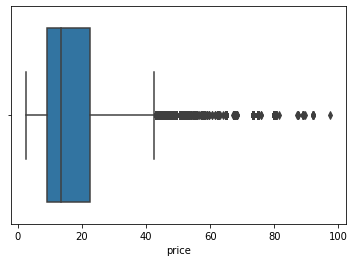

In [ ]:
sb.boxplot(base_data['price'])

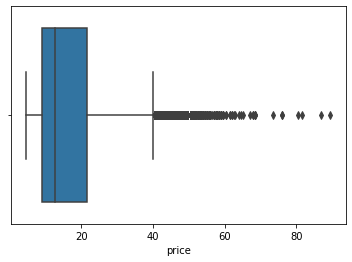

In [ ]:
sb.boxplot(uber_data['price'])

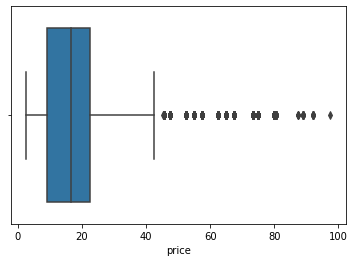

In [ ]:
sb.boxplot(lyft_data['price'])

Dari boxplot diatas dapat disimpulkan bahwa ada banyak outlier pada kolom price, maka kita akan melakukan handling outlier dengan cara mencari nilai upper_range dari Q3 nya. Maka dari itu kita cari terlebih darhulu Q1, Q2, Q3, baru kemudian kita cari lower_range dan upper_range nya.

In [ ]:
## buat function untuk menghitung otomatis nilai batas atas dan batas bawah 
def batas_atas(df):
  Q3 = np.quantile(df['price'], 0.75)
  Q1 = np.quantile(df['price'], 0.25)
  IQR = Q3 - Q1

  lower_boundaries = Q1 - 1.5 * IQR
  upper_boundaries = Q3 + 1.5 * IQR

  print(f'lower boundaries = {lower_boundaries}')
  print(f'upper boundaries = {upper_boundaries}')

In [ ]:
print('base model :')
batas_atas(base_data)
print('\nuber model :')
batas_atas(uber_data)
print('\nlyft model :')
batas_atas(lyft_data)

base model :
lower boundaries = -11.25
upper boundaries = 42.75

uber model :
lower boundaries = -9.75
upper boundaries = 40.25

lyft model :
lower boundaries = -11.25
upper boundaries = 42.75


Dapat dilihat bahwa batas atas dari price yang ada pada base model dan lyft model berada di angka 42.75, sedangkan price pada uber modelberada pada 40.25, sehingga kita dapat melakukan handling outlier dengan cara impute atau mengganti nilai outlier dengan nilai upper boundaries karena outlier pada atribut price berada setelah upper boundaries, sehingga kita dapat menggunakan nilai 42.75 dan 40.25 sebagai pengganti value pada outlier yang ada.

In [ ]:
def impute_outlier(df, upper_bound):
  ## kode untuk mencetak outlier dan melihat jumlah outlier yang ada
  outliers = np.where(df.price > upper_bound)
  print(f'sum of outlier : {np.count_nonzero(df.price > upper_bound)}')
  print(f'outlier : \n{outliers[0]}\n')

  ## loading
  proses='=============\nProses membersihkan outliers '
  loading='. . . .'
  def message(proses, loading):
    print(proses)
    for i in loading:
      print(i, end='')
      time.sleep(0.5)
  if __name__ == '__main__':
    message(proses, loading)

  ## kode untuk impute outlier
  df.loc[df['price']>=upper_bound, 'price']=upper_bound
  print('\n\n==============\nOutlier berhasil di impute!')

In [ ]:
impute_outlier(base_data, upper_bound=42.75)

sum of outlier : 5589
outlier : 
[   645    646    706 ... 637813 637878 637917]

Proses membersihkan outliers 
. . . .

Outlier berhasil di impute!


Dapat dilihat bahwa jumlah outlier pada dataframe base_data berjumlah 5589, dan outlier tersebut sudah berhasil di impute.

In [ ]:
impute_outlier(uber_data, upper_bound=40.25)

sum of outlier : 3015
outlier : 
[   298    965   1013 ... 330257 330506 330539]

Proses membersihkan outliers 
. . . .

Outlier berhasil di impute!


Dapat dilihat bahwa jumlah outlier pada dataframe base_data berjumlah 3015, dan outlier tersebut sudah berhasil di impute.

In [ ]:
impute_outlier(lyft_data, upper_bound=42.75)

sum of outlier : 4092
outlier : 
[   289    290    338 ... 307096 307275 307347]

Proses membersihkan outliers 
. . . .

Outlier berhasil di impute!


Dapat dilihat bahwa jumlah outlier pada dataframe base_data berjumlah 4092, dan outlier tersebut sudah berhasil di impute.

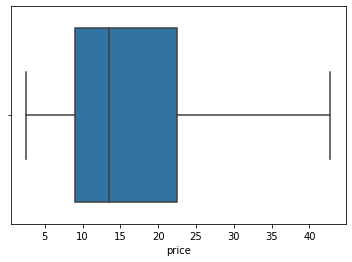

In [ ]:
sb.boxplot(base_data['price'])

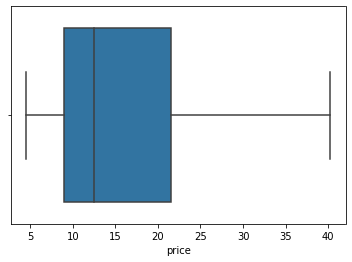

In [ ]:
sb.boxplot(uber_data['price'])

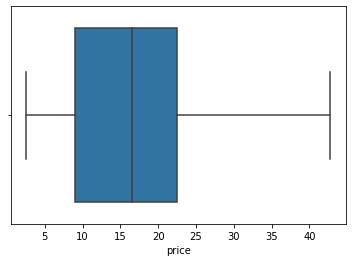

In [ ]:
sb.boxplot(lyft_data['price'])

dapat dilihat bahwa outlier yang ada pada dataframe base_data, uber_data, dan lyft_data sudah tidak ada, atau lebih tepatnya nilai outlier yang ada sudah diganti dengan nilai upper boundaries

# Data Preprocessing (stage 2)

Data Preprocessing stage 2 adalah Data Preprocessing yang berisi data yang telah melewati proses handling outlier

## Base model

In [ ]:
base_data.head()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,cab_descr_Black,cab_descr_Black SUV,cab_descr_Lux,cab_descr_Lux Black,cab_descr_Lux Black XL,cab_descr_Lyft,cab_descr_Lyft XL,cab_descr_Shared,cab_descr_UberPool,cab_descr_UberX,cab_descr_UberXL,cab_descr_WAV,weather_ Clear,weather_ Drizzle,weather_ Foggy,weather_ Light Rain,weather_ Mostly Cloudy,weather_ Overcast,weather_ Partly Cloudy,weather_ Possible Drizzle,weather_ Rain
0,5.0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,7.0,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,26.0,0.44,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,9.0,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Define model

Didefinisikan model x dan y dengan base data seperti di bawah ini

In [ ]:
x_base_2 = base_data.drop(['price', 'surge_multiplier'], axis=1) ## data feature
y_base_2 = base_data['price'] ## data target

In [ ]:
# Splitting X dan y menjadi data training dan data testing
x_train_base_2, x_test_base_2, y_train_base_2, y_test_base_2 = train_test_split(x_base_2, y_base_2, test_size=0.3, random_state=100)

### Melatih model

Setelah didefinisikan, data di atas diolah dengan menggunakan .fit() dan .predict() serta kita cek nilai interceptnya seperti di bawah ini

In [ ]:
model_base_2 = linreg.fit(x_train_base_2, y_train_base_2)
y_pred_base_2 = linreg.predict(x_test_base_2.values)
y_pred_train_base_2 = linreg.predict(x_train_base_2.values)

### Menghitung nilai koefisien dan juga nilai intercept

In [ ]:
print(pd.DataFrame(model_base_2.coef_, x_base_2.columns, columns=['Coefficients']))

                            Coefficients
distance                        2.754256
cab_type_Lyft                   0.630742
cab_type_Uber                  -0.630742
cab_descr_Black                 4.634060
cab_descr_Black SUV            14.305044
cab_descr_Lux                   0.634816
cab_descr_Lux Black             5.825963
cab_descr_Lux Black XL         14.612877
cab_descr_Lyft                 -7.513997
cab_descr_Lyft XL              -1.828028
cab_descr_Shared              -11.100889
cab_descr_UberPool             -7.120036
cab_descr_UberX                -6.104534
cab_descr_UberXL               -0.212011
cab_descr_WAV                  -6.133264
weather_ Clear                 -0.009067
weather_ Drizzle                0.060744
weather_ Foggy                  0.020924
weather_ Light Rain            -0.027821
weather_ Mostly Cloudy          0.013967
weather_ Overcast              -0.025652
weather_ Partly Cloudy          0.002024
weather_ Possible Drizzle      -0.002165
weather_ Rain   

In [ ]:
print(f'intercept : {model_base_2.intercept_}')

intercept : 10.482415767452217


### Evaluasi performa base model

Setelah diolah, akan dicek r2 score, mean absolute error, mean squared error dan root mean squared error seperti di bawah ini

In [ ]:
print(f'r2 score test : {r2_score(y_test_base_2, y_pred_base_2)}')
print(f'r2 score train : {r2_score(y_train_base_2, y_pred_train_base_2)}')

r2 score test : 0.9132458382469186
r2 score train : 0.9135593835739779


In [ ]:
mae_base_2 = mean_absolute_error(y_test_base_2, y_pred_base_2)
mse_base_2 = mean_squared_error(y_test_base_2, y_pred_base_2)
rmse_base_2 = mean_squared_error(y_test_base_2, y_pred_base_2, squared=False)

print(f'Mean Absolute Error = {mae_base_2}\nMean Squared Error = {mse_base_2}\nRoot Mean Squared Error = {rmse_base_2}')

Mean Absolute Error = 1.8687547786894696
Mean Squared Error = 7.141097650418014
Root Mean Squared Error = 2.672283227956575


Dapat dilihat pada hasil diatas bahwa base model yang kita miliki mendapatkan sedikit peningkatan nilai r2 score menjadi 0.9346583071462289 atau 91.32% pada data test dan peningkatan menjadi 91.35% pada data train. Selain itu, MAE menunjukkan penurunan menjadi 1.86% dan RMSE menunjukkan penurunan menjadi 2.67% yang berarti model data kita memiliki nilai data hasil prediksi dekat dengan nilai aktual.

## Uber model

In [ ]:
uber_data.head()

,price,distance,surge_multiplier,cab_descr_Black,cab_descr_Black SUV,cab_descr_UberPool,cab_descr_UberX,cab_descr_UberXL,cab_descr_WAV,weather_ Clear,weather_ Drizzle,weather_ Foggy,weather_ Light Rain,weather_ Mostly Cloudy,weather_ Overcast,weather_ Partly Cloudy,weather_ Possible Drizzle,weather_ Rain
0,12.0,1.11,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,16.0,1.11,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,7.5,1.11,1.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,7.5,1.11,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,26.0,1.11,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


### Define model

Didefinisikan data uber x dan y dimana untuk x adalah data feature dengan drop kolom price dan surge multiplier serta y adalah data target yakni kolom price

In [ ]:
x_uber_2 = uber_data.drop(['price', 'surge_multiplier'], axis=1) ## data feature
y_uber_2 = uber_data['price'] ## data target

In [ ]:
# Splitting X dan y menjadi data training dan data testing
x_train_uber_2, x_test_uber_2, y_train_uber_2, y_test_uber_2 = train_test_split(x_uber_2, y_uber_2, test_size=0.3, random_state=100)

### Melatih model

Setelah didefinisikan, data di atas diolah dengan menggunakan .fit() dan .predict() serta kita cek nilai interceptnya seperti di bawah ini

In [ ]:
model_uber_2 = linreg.fit(x_train_uber_2, y_train_uber_2)
y_pred_uber_2 = linreg.predict(x_test_uber_2.values)
y_pred_train_uber_2 = linreg.predict(x_train_uber_2.values)

### Menghitung nilai koefisien dan nilai intercept

In [ ]:
print(pd.DataFrame(model_uber_2.coef_, x_uber_2.columns, columns=['Coefficients']))

                            Coefficients
distance                        2.354835
cab_descr_Black                 4.763603
cab_descr_Black SUV            14.324374
cab_descr_UberPool             -6.995223
cab_descr_UberX                -5.991602
cab_descr_UberXL               -0.100757
cab_descr_WAV                  -6.000395
weather_ Clear                 -0.026985
weather_ Drizzle                0.106644
weather_ Foggy                 -0.028964
weather_ Light Rain            -0.006393
weather_ Mostly Cloudy         -0.005357
weather_ Overcast              -0.017654
weather_ Partly Cloudy          0.001379
weather_ Possible Drizzle       0.000200
weather_ Rain                  -0.022872


In [ ]:
print(f'intercept : {model_uber_2.intercept_}')

intercept : 10.60668297974197


### Evaluasi performa uber model

Setelah diolah, data lyft diatas dievaluasi dengan menggunakan r2 score, MAE, MSE, dan RMSE seperti di bawah ini

In [ ]:
print(f'r2 score test : {r2_score(y_test_uber_2, y_pred_uber_2)}')
print(f'r2 score train : {r2_score(y_train_uber_2, y_pred_train_uber_2)}')

r2 score test : 0.9244592234880122
r2 score train : 0.9257886371409736


In [ ]:
mae_uber_2 = mean_absolute_error(y_test_uber_2, y_pred_uber_2)
mse_uber_2 = mean_squared_error(y_test_uber_2, y_pred_uber_2)
rmse_uber_2 = mean_squared_error(y_test_uber_2, y_pred_uber_2, squared=False)

print(f'Mean Absolute Error = {mae_uber_2}\nMean Squared Error = {mse_uber_2}\nRoot Mean Squared Error = {rmse_uber_2}')

Mean Absolute Error = 1.6307988733421914
Mean Squared Error = 5.401564157210728
Root Mean Squared Error = 2.3241265364025963


Dapat dilihat pada hasil diatas bahwa Uber model yang kita miliki mendapatkan peningkatan nilai r2 score menjadi 92.44% pada data test dan menjadi 92.57% pada data train. Selain itu, MAE menunjukkan penurunan 1.63% dan RMSE menunjukkan penurunan menjadi 2.32% yang berarti model data kita memiliki nilai data hasil prediksi dekat dengan nilai aktual.

## Lyft model

In [ ]:
lyft_data.head()

,price,distance,surge_multiplier,cab_descr_Lux,cab_descr_Lux Black,cab_descr_Lux Black XL,cab_descr_Lyft,cab_descr_Lyft XL,cab_descr_Shared,weather_ Clear,weather_ Drizzle,weather_ Foggy,weather_ Light Rain,weather_ Mostly Cloudy,weather_ Overcast,weather_ Partly Cloudy,weather_ Possible Drizzle,weather_ Rain
0,5.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,7.0,0.44,1.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,26.0,0.44,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,9.0,0.44,1.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


### Define model

Didefinisikan x dan y dari data lyft yang telah dikelompokkan dan diencoding seperti di bawah ini

In [ ]:
x_lyft_2 = lyft_data.drop(['price', 'surge_multiplier'], axis=1) ## data feature
y_lyft_2 = lyft_data['price'] ## data target

Lalu, data di atas dipisahkan dengan menggunakan train_test_split dengan 30% data untuk ditest dan 70% untuk ditrain serta random state = 100

In [ ]:
# Splitting X dan y menjadi data training dan data testing
x_train_lyft_2, x_test_lyft_2, y_train_lyft_2, y_test_lyft_2 = train_test_split(x_lyft_2, y_lyft_2, test_size=0.3, random_state=100)

### Melatih model

Serta didefinisikan dan dipisah, data yang dipisahkan akan diolah dengan menggunakan .fit() dan .predict()

In [ ]:
model_lyft_2 = linreg.fit(x_train_lyft_2, y_train_lyft_2)
y_pred_lyft_2 = linreg.predict(x_test_lyft_2.values)
y_pred_train_lyft_2 = linreg.predict(x_train_lyft_2.values)

In [ ]:
print(pd.DataFrame(model_lyft_2.coef_, x_lyft_2.columns, columns=['Coefficients']))

                            Coefficients
distance                        3.192006
cab_descr_Lux                   0.543820
cab_descr_Lux Black             5.720386
cab_descr_Lux Black XL         14.496060
cab_descr_Lyft                 -7.625590
cab_descr_Lyft XL              -1.927344
cab_descr_Shared              -11.207333
weather_ Clear                 -0.001403
weather_ Drizzle                0.073065
weather_ Foggy                  0.006262
weather_ Light Rain            -0.022249
weather_ Mostly Cloudy          0.039881
weather_ Overcast              -0.022840
weather_ Partly Cloudy         -0.004526
weather_ Possible Drizzle      -0.028337
weather_ Rain                  -0.039852


In [ ]:
print(f'intercept : {model_lyft_2.intercept_}')

intercept : 10.253074217759512


### Evaluasi performa

Setelah diolah, akan dievaluasi dengan mengecek nilai r2 score, MAE, MSE, dan RMSE seperti di bawah ini

In [ ]:
print(f'r2 score test : {r2_score(y_test_lyft_2, y_pred_lyft_2)}')
print(f'r2 score train : {r2_score(y_train_lyft_2, y_pred_train_lyft_2)}')

r2 score test : 0.9070631672218827
r2 score train : 0.9088027249645334


In [ ]:
mae_lyft_2 = mean_absolute_error(y_test_lyft_2, y_pred_lyft_2)
mse_lyft_2 = mean_squared_error(y_test_lyft_2, y_pred_lyft_2)
rmse_lyft_2 = mean_squared_error(y_test_lyft_2, y_pred_lyft_2, squared=False)

print(f'Mean Absolute Error = {mae_lyft_2}\nMean Squared Error = {mse_lyft_2}\nRoot Mean Squared Error = {rmse_lyft_2}')

Mean Absolute Error = 2.0283543616452833
Mean Squared Error = 8.615332911839683
Root Mean Squared Error = 2.9351887353013066


Dapat dilihat pada hasil diatas bahwa Lyft model yang kita miliki mendapatkan kenaikan nilai r2 score menjadi 90.70% pada data test dan 90.88% pada data train. Selain itu, MAE menunjukkan 2.03% dan RMSE menunjukkan 2.93% yang berarti model data kita memiliki nilai data hasil prediksi dekat dengan nilai aktual.

# Model Inference

Block code berikut adalah block code model interference untuk 3 model yang ada. Kita hanya perlu membuat satu block code untuk model interference dikarenakan hasilnya akan sama saja meskipun kita menggunakan model yang berbeda. Contohnya adalah salah satu pengguna ingin memesan taksi untuk jarak 4 km, dengan transportasi Uber jenis WAV dengan cuaca Mostly Cloudy

## Contoh Penerapan Model Interference

In [ ]:
distances = int(input('Distance I want to travel : '))
cabin_types = input('\nTransportation I want to use : \n - Lyft \n - Uber \n')
cabin_descr = input('\nType of Uber I want to use :\n - Black\n - Black SUV\n - Uber Pool\n - UberX\n - UberXL\n - WAV\n') if cabin_types == 'Uber' else input('Type of Lyft I want to use : \n - Lux\n - Lux Black\n - Lux Black XL\n - Lyft\n - Lyft XL\n - Shared\n') if cabin_types == 'Lyft' else print('Uber / Lyft ?')
weather = input('\nWeather right now is :\n - Clear\n - Drizzle\n - Foggy\n - Light Rain\n - Mostly Cloudy\n - Overcast\n - Partly Cloudy\n - Possible Drizzle\n - Rain\n ')

input_data = [distances]

uber = {'Black' : 0, 'Black SUV' : 1, 'Uber Pool' : 2,
        'Uber X': 3, 'Uber XL' : 4, 'WAV' : 5}

lyft = {'Lux' : 0, 'Lux Black': 1, 'Lux Black XL' : 2,
        'Lyft' : 3, 'Lyft XL' : 4, 'Shared' : 5}

if cabin_types == 'Uber':
  for i in range(0,6):
    if uber[cabin_descr]==i:
      input_data.append(1)
    else:
      input_data.append(0)

else:
  for i in range(0,6):
    if lyft[cabin_descr]==i:
      input_data.append(1)
    else:
      input_data.append(0)

weather_today = {'Clear' : 0, 'Drizzle' : 1, 'Foggy' : 2, 'Light Rain': 3,'Mostly Cloudy' : 4,
                 'Overcast' : 5, 'Partly Cloudy' : 6, 'Possible Drizzle' : 7, 'Rain' : 8}
                 
for i in range(0,9):
    if weather_today[weather]==i:
        input_data.append(1)
    else:
        input_data.append(0)

print(f'\n=============================\nYour data input is :\n{input_data}')

price_prediction = model_base_2.predict([input_data])

lowest_price = price_prediction*1.0
highest_price = price_prediction*3.0
print(f'\n=============================\nEstimated Price Range : \n - Lowest Price is $ {np.round_(lowest_price[0], 2)} \n - Highest Price is $ {np.round_(highest_price[0], 2)}')

Distance I want to travel : 4

Transportation I want to use : 
 - Lyft 
 - Uber 
Uber

Type of Uber I want to use :
 - Black
 - Black SUV
 - Uber Pool
 - UberX
 - UberXL
 - WAV
WAV

Weather right now is :
 - Clear
 - Drizzle
 - Foggy
 - Light Rain
 - Mostly Cloudy
 - Overcast
 - Partly Cloudy
 - Possible Drizzle
 - Rain
 Mostly Cloudy

Your data input is :
[4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]

Estimated Price Range : 
 - Lowest Price is $ 11.85 
 - Highest Price is $ 35.56


Dapat kita lihat bahwa prediksi tersebut menghasilkan estimasi harga transportasi yang akan kita naiki, yaitu mengambil value extimasi harga terendah dan harga tertinggi. Dari data di atas diperoleh range harga termurah: \\$11.85 dan harga termahalnya adalah \\$35.56

## Testing Model Inference

In [ ]:
distances = int(input('Distance I want to travel : '))
cabin_types = input('\nTransportation I want to use : \n - Lyft \n - Uber \n')
cabin_descr = input('\nType of Uber I want to use :\n - Black\n - Black SUV\n - Uber Pool\n - UberX\n - UberXL\n - WAV\n') if cabin_types == 'Uber' else input('Type of Lyft I want to use : \n - Lux\n - Lux Black\n - Lux Black XL\n - Lyft\n - Lyft XL\n - Shared\n') if cabin_types == 'Lyft' else print('Uber / Lyft ?')
weather = input('\nWeather right now is :\n - Clear\n - Drizzle\n - Foggy\n - Light Rain\n - Mostly Cloudy\n - Overcast\n - Partly Cloudy\n - Possible Drizzle\n - Rain\n ')

input_data = [distances]

uber = {'Black' : 0, 'Black SUV' : 1, 'Uber Pool' : 2,
        'Uber X': 3, 'Uber XL' : 4, 'WAV' : 5}

lyft = {'Lux' : 0, 'Lux Black': 1, 'Lux Black XL' : 2,
        'Lyft' : 3, 'Lyft XL' : 4, 'Shared' : 5}

if cabin_types == 'Uber':
  for i in range(0,6):
    if uber[cabin_descr]==i:
      input_data.append(1)
    else:
      input_data.append(0)

else:
  for i in range(0,6):
    if lyft[cabin_descr]==i:
      input_data.append(1)
    else:
      input_data.append(0)

weather_today = {'Clear' : 0, 'Drizzle' : 1, 'Foggy' : 2, 'Light Rain': 3,'Mostly Cloudy' : 4,
                 'Overcast' : 5, 'Partly Cloudy' : 6, 'Possible Drizzle' : 7, 'Rain' : 8}
                 
for i in range(0,9):
    if weather_today[weather]==i:
        input_data.append(1)
    else:
        input_data.append(0)

print(f'\n=============================\nYour data input is :\n{input_data}')

price_prediction = model_base_2.predict([input_data])

lowest_price = price_prediction*1.0
highest_price = price_prediction*3.0
print(f'\n=============================\nEstimated Price Range : \n - Lowest Price is $ {np.round_(lowest_price[0], 2)} \n - Highest Price is $ {np.round_(highest_price[0], 2)}')